# Implementation of DBSCAN Algorithm for Data Clustering

In [27]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [80]:
# Implement DBSCAN algorithm
from sklearn.neighbors import KDTree
class DBSCAN:
    def __init__(self, eps, min_samples):
        self.eps = eps
        self.min_samples = min_samples

    def fit(self, X):
        self.X = X
        self.n_samples = X.shape[0]
        self.n_features = X.shape[1]
        # 0 - unvisited, -1 - noise, >0 - cluster number
        self.visited = np.zeros(self.n_samples, dtype=bool)
        # cluster labels
        self.labels = np.full(self.n_samples, -1, dtype=np.intp)
        self.cluster = 0

        # Find core points and expand clusters
        for i in range(self.n_samples):
            if not self.visited[i]:
                self.visited[i] = True
                neighbors = self.find_neighbors(i)
                if len(neighbors) >= self.min_samples:
                    self.expand_cluster(i, neighbors)
                    self.cluster += 1

        return self.labels

    # Expand cluster to include all points that are density-reachable
    def expand_cluster(self, i, neighbors):
        self.labels[i] = self.cluster
        for j in neighbors:
            if not self.visited[j]:
                self.visited[j] = True
                neighbors_ = self.find_neighbors(j)
                if len(neighbors_) >= self.min_samples:
                    neighbors = np.concatenate((neighbors, neighbors_))
            if self.labels[j] == -1:
                self.labels[j] = self.cluster

    # Find neighbors of a point using KDTree algorithm for an efficient search
    def find_neighbors(self, idx):
        tree = KDTree(self.X)
        neighbors = tree.query_radius([self.X[idx]], r=self.eps)[0]
        return neighbors

In [81]:
# Load Iris dataset for experiment
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
X.shape

(150, 4)

In [82]:
# Normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [94]:
# Cluster Iris dataset using DBSCAN algorithm
dbscan = DBSCAN(eps=2.7, min_samples=5)
clusters = dbscan.fit(X)
clusters

array([ 0,  1,  1,  1,  0,  2,  3,  0,  4,  1,  0,  0,  1,  4, -1, -1,  2,
        0,  2,  2,  0,  0,  3,  5,  0,  1,  0,  0,  0,  1,  1,  0, -1, -1,
        1,  1,  0,  0,  4,  0,  0, -1,  3,  0,  2,  1,  2,  1,  0,  0,  7,
        6,  7,  8,  9, 10,  6, -1,  9, -1, -1, 11, -1,  9, 10,  6, 10, 10,
       -1,  8, 12, 10, -1, 10,  9,  6,  9,  7, 10, 13,  8,  8, 10, 14, 15,
       12,  6, -1, 10,  8, 10, 11, 10, -1, 10, 10, 10,  9, -1, 10, 16, 14,
       17, 18, 19, -1, -1, 17, -1, -1, 20, 18, 17, -1, -1, 16, 18, -1, -1,
       -1, 17, -1, -1,  9, 20, -1,  9, 12, 18, -1, -1, -1, 18,  9, 14, -1,
       16, 18, 11, 17, 19, 21, 14, 21, 16, 19, -1, 18, 16, 12],
      dtype=int64)

In [95]:
# Silhouette score
from sklearn.metrics import silhouette_score
silhouette_score(X, clusters)

-0.02674078738395684

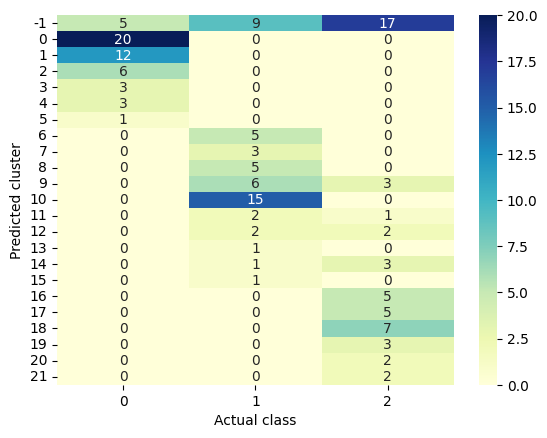

In [96]:
# Heatmap of predicted clusters and actual classes
import seaborn as sns
sns.heatmap(pd.crosstab(clusters, y), annot=True, cmap="YlGnBu")
xlabel = plt.xlabel("Actual class")
ylabel = plt.ylabel("Predicted cluster")

Text(0.5, 1.0, 'Predicted clusters')

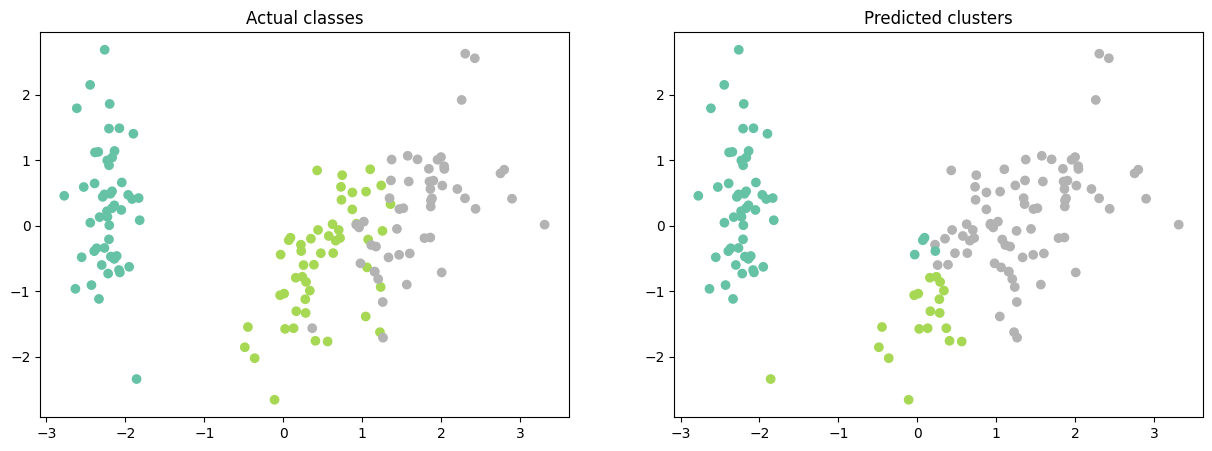

In [86]:
# Perform PCA for visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot 2 graphs one for actual classes and one for predicted clusters
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="Set2")
ax1.set_title("Actual classes")
ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap="Set2")
ax2.set_title("Predicted clusters")


In [97]:
# Let's try to cluster some blobs
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=5, cluster_std=0.5, random_state=0)

# Normalize data

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Cluster blobs using DBSCAN algorithm
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit(X)
clusters

# Silhouette score
silhouette_score(X, clusters)

0.48509071568527645

<Axes: xlabel='col_0', ylabel='row_0'>

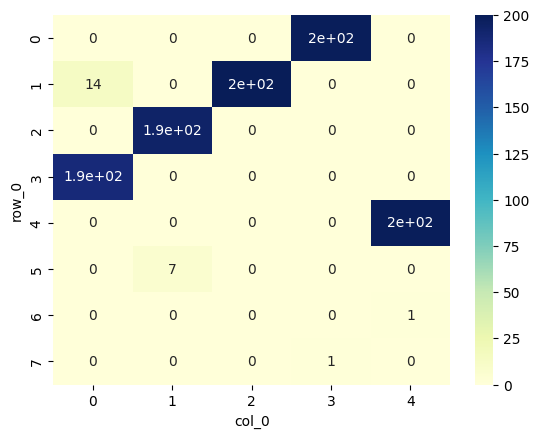

In [98]:
# Heatmap of predicted clusters and actual classes
sns.heatmap(pd.crosstab(clusters, y), annot=True, cmap="YlGnBu")

Text(0.5, 1.0, 'K-distance graph')

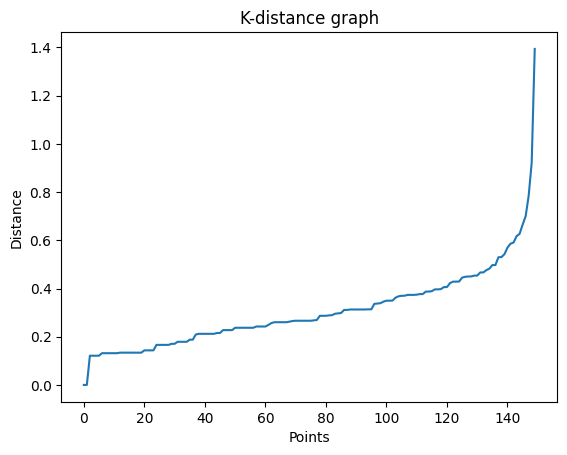

In [93]:
# Finding the optimal value of eps and min_samples
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")
plt.title("K-distance graph")


In [77]:
# Sklearn implementation of DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5, metric="euclidean")
clusters = dbscan.fit_predict(X)
clusters


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [78]:
# Silhouette score
from sklearn.metrics import silhouette_score
silhouette_score(X, clusters)

0.5817500491982808

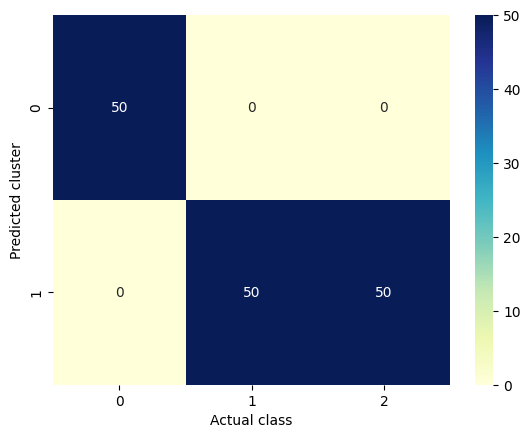

In [79]:
# Heatmap of predicted clusters and actual classes
import seaborn as sns
sns.heatmap(pd.crosstab(clusters, y), annot=True, cmap="YlGnBu")
xlabel = plt.xlabel("Actual class")
ylabel = plt.ylabel("Predicted cluster")